### Imports and database initialization

In [2]:
from sqlalchemy import select, func
from gorillatracker.ssl_pipeline.models import Tracking, Video, Camera
from sqlalchemy.orm import sessionmaker
from gorillatracker.ssl_pipeline.dataset import GorillaDatasetKISZ

from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import numpy as np

engine = GorillaDatasetKISZ().engine
session_cls = sessionmaker(bind=engine)

### Number of frames per camera (sorted descending)

In [2]:
stmt = (
    select(Video.camera_id, func.sum(Video.frames).label("count"))
    .group_by(Video.camera_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    sorted_all = sorted(result.fetchall(), key=lambda x: x[1], reverse=True)
    print(tabulate(sorted_all, headers=result.keys(), tablefmt="psql"))

+-------------+----------+
|   camera_id |    count |
|-------------+----------|
|           8 | 22810431 |
|          27 | 21863565 |
|          23 | 20398818 |
|          29 | 20262736 |
|          24 | 17221255 |
|          13 | 16077779 |
|          10 | 14635011 |
|          30 | 14548329 |
|           6 | 14239034 |
|          19 | 13367589 |
|           5 | 13345850 |
|          21 | 11077470 |
|           4 | 11000887 |
|          18 | 10131783 |
|          44 |  9567031 |
|          17 |  8609072 |
|          25 |  8254713 |
|          35 |  7875832 |
|           7 |  7545998 |
|          12 |  7341795 |
|          14 |  7102646 |
|          43 |  6848558 |
|          31 |  5999730 |
|          32 |  5970690 |
|          11 |  5962177 |
|          33 |  5874525 |
|          34 |  5529120 |
|          16 |  5333233 |
|          36 |  5120115 |
|          20 |  4601223 |
|          15 |  4570771 |
|           2 |  4409776 |
|           3 |  4227325 |
|          22 |  4114441 |
|

### Number of Tracking-IDs per Video

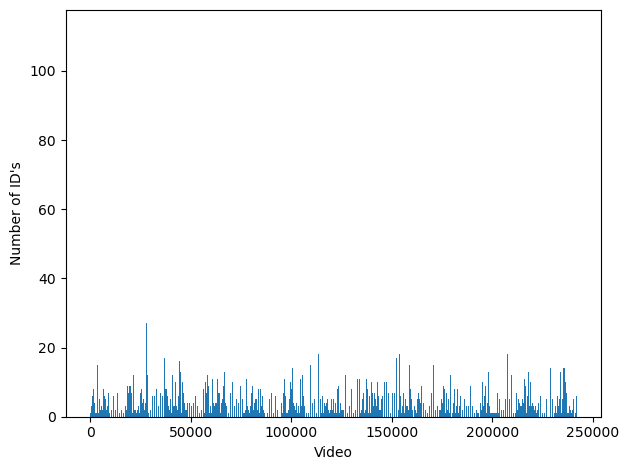

In [3]:
stmt = (
    select(Tracking.video_id, func.count(Tracking.tracking_id).label("count"))
    .group_by(Tracking.video_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    sorted_all = sorted(result.fetchall(), key=lambda x: x[1], reverse=True)
    
list1, list2 = zip(*sorted_all)
plt.bar(list1, list2)
plt.xlabel("Video")
plt.ylabel("Number of ID's")
plt.tight_layout()
plt.show()

### Number of Tracking-IDs per camera

+-------------+-------------+
|   camera_id |       count |
|-------------+-------------|
|           1 |  3297553380 |
|           2 |  7763622326 |
|           3 |  5497374288 |
|           4 | 25867113954 |
|           5 | 21071628446 |
|           6 | 26295694187 |
|           7 |  5792377874 |
|           8 | 41656007280 |
|           9 |  5650034673 |
|          10 | 29285999039 |
|          11 | 12957741670 |
|          12 | 14392803646 |
|          13 | 36817759694 |
|          14 | 10440474952 |
|          15 |  9418486014 |
|          16 | 13573699454 |
|          17 | 13954982380 |
|          18 | 16432695337 |
|          19 | 20001979079 |
|          20 |  8676683074 |
|          21 | 24824356897 |
|          22 |  6933957105 |
|          23 | 29108282017 |
|          24 | 26582148126 |
|          25 | 13230903495 |
|          26 |  5124474430 |
|          27 | 47232417089 |
|          28 |  1395116436 |
|          29 | 54356243507 |
|          30 | 27030887927 |
|         

IntProgress(value=0, max=91)

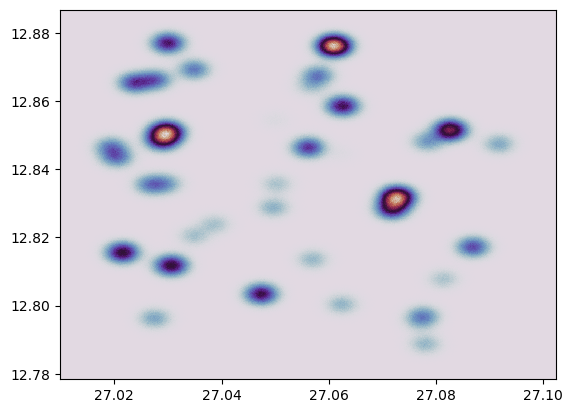

In [7]:
from ipywidgets import IntProgress

stmt = (
    select(Video.camera_id, func.sum(Tracking.tracking_id).label("count"))
    .join(Tracking, Video.video_id == Tracking.video_id)
    .group_by(Video.camera_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = sorted(result.fetchall(), key=lambda x: x[0])
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))

stmt = (
    select(Camera.camera_id, Camera.longitude, Camera.latitude)
    )

with session_cls() as session:
    result = session.execute(stmt)
    all2 = sorted(result.fetchall(), key=lambda x: x[0])
    print(tabulate(all2, headers=result.keys(), tablefmt="psql"))

mapping = {x : (y,z) for x, y, z in all2}

f = IntProgress(min=0, max=len(all)) # instantiate the bar
display(f)

points = []
for (camera_id2, count) in all:
    f.value += 1
    (long, lat) = mapping[camera_id2]
    if long is None or lat is None:
        continue
    for i in range(count//10000):
        points.append((long + np.random.normal(0, 0.002), lat + np.random.normal(0, 0.002)))

x, y = zip(*points)

plt.hist2d(x,y, bins=1000, cmap="twilight")
plt.show()

### Average number of Tracking-IDs in videos per camera

+-------------+---------+
|   camera_id |   count |
|-------------+---------|
|           1 | 552.5   |
|           3 | 176.833 |
|           4 | 324.704 |
|           5 | 731     |
|           6 | 391.196 |
|           7 | 642     |
|           8 | 571.5   |
|          10 | 655.789 |
|          11 | 261.959 |
|          12 | 540.65  |
|          13 | 688.5   |
|          14 | 584.054 |
|          17 | 599.5   |
|          18 | 811.638 |
|          19 | 769     |
|          21 | 325.867 |
|          23 | 815.9   |
|          24 | 392     |
|          25 | 405.719 |
|          26 | 657     |
|          27 | 601     |
|          29 | 570.826 |
|          30 | 533.485 |
|          31 | 136.429 |
|          32 | 442.167 |
|          33 | 539     |
|          34 | 599.44  |
|          35 | 750.5   |
|          36 | 162.688 |
+-------------+---------+


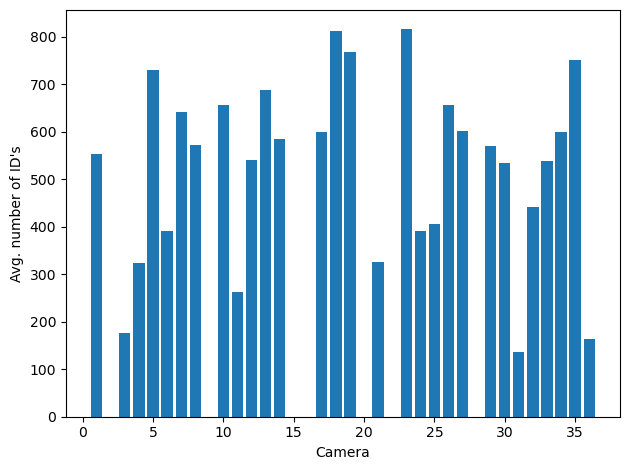

In [5]:
stmt = (
    select(Video.camera_id, func.avg(Tracking.tracking_id).label("count"))
    .join(Tracking, Video.video_id == Tracking.video_id)
    .group_by(Video.camera_id)
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = sorted(result.fetchall(), key=lambda x: x[0])
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))
    
list1, list2 = zip(*all)
plt.bar(list1, list2)
plt.xlabel("Camera")
plt.ylabel("Avg. number of ID's")
plt.tight_layout()
plt.show()

### Number of Videos per Date

+---------------------+
| start_time          |
|---------------------|
| 2022-03-24 06:27:00 |
| 2022-11-14 14:56:00 |
| 2023-01-20 14:08:00 |
| 2022-06-19 09:12:00 |
| 2022-03-23 09:14:00 |
| 2022-02-28 17:02:00 |
| 2022-03-06 11:59:00 |
| 2022-04-03 10:24:00 |
| 2022-04-28 14:45:00 |
| 2022-09-12 15:56:00 |
| 2022-12-13 15:22:00 |
| 2022-05-29 09:35:00 |
| 2022-12-06 06:52:00 |
| 2022-07-06 09:11:00 |
| 2022-03-30 09:06:00 |
| 2022-10-20 09:26:00 |
| 2022-07-11 13:32:00 |
| 2022-05-20 11:03:00 |
| 2022-07-11 16:04:00 |
| 2022-02-26 11:22:00 |
| 2022-03-26 12:46:00 |
| 2022-11-14 15:19:00 |
| 2023-01-20 14:09:00 |
| 2022-06-19 09:26:00 |
| 2022-04-09 13:51:00 |
| 2022-03-01 06:50:00 |
| 2022-03-06 12:10:00 |
| 2022-04-03 10:48:00 |
| 2022-05-04 14:51:00 |
| 2022-09-25 09:31:00 |
| 2023-01-03 11:32:00 |
| 2022-06-19 09:15:00 |
| 2022-12-23 12:18:00 |
| 2022-07-09 11:22:00 |
| 2022-04-03 13:24:00 |
| 2022-11-11 14:18:00 |
| 2022-07-15 09:13:00 |
| 2022-05-20 11:15:00 |
| 2022-07-11 16:

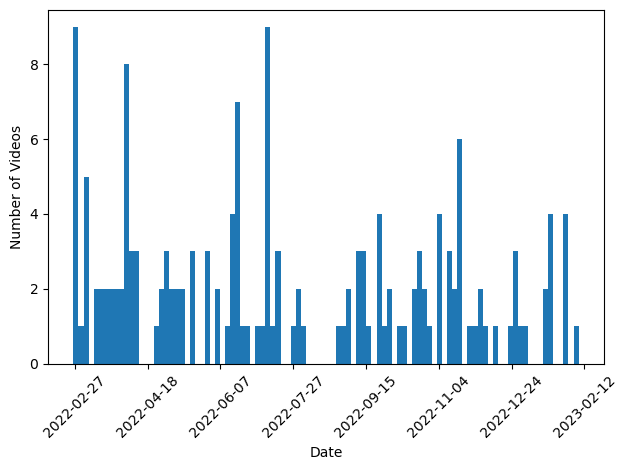

In [6]:
with session_cls() as session:
    result = session.execute(select(Video.start_time))
    all = result.fetchall()
    print(tabulate(all, headers=result.keys(), tablefmt="psql"))
    
all_dates = [mdates.date2num(date[0].date()) for date in all]

fig, ax = plt.subplots()
ax.hist(all_dates, bins=100)
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.xlabel("Date")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Length of Videos

[(20.25, 2), (30.25, 91), (31.25, 4), (32.25, 6), (33.25, 4), (34.25, 3), (35.25, 4), (36.25, 2), (37.25, 3), (38.25, 1), (39.25, 2), (40.25, 1), (42.25, 3), (43.0, 1), (43.25, 1), (44.25, 3), (45.25, 2), (46.25, 1), (47.25, 4), (48.25, 3), (49.25, 2), (51.25, 1), (52.25, 1), (53.25, 1), (55.25, 1), (56.25, 1), (57.25, 1), (64.25, 1), (74.25, 1), (77.25, 2), (88.25, 1), (90.25, 1), (92.25, 1), (96.25, 1), (110.25, 1), (126.25, 1), (264.25, 1)]


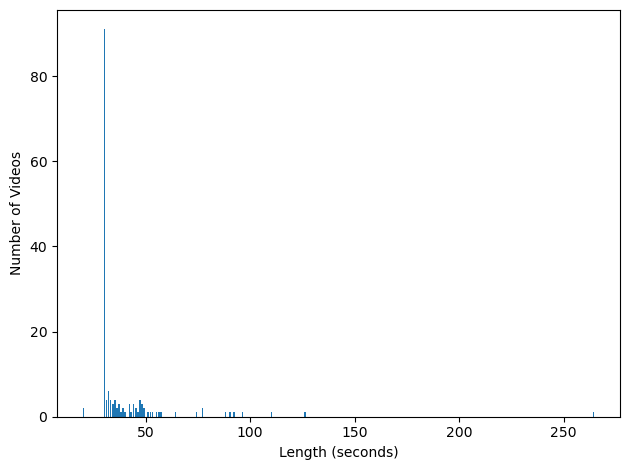

In [7]:
stmt = (
    select((Video.frames / Video.fps).label("duration"), func.count(Video.video_id).label("count"))
    .group_by("duration")
    )

with session_cls() as session:
    result = session.execute(stmt)
    all = result.fetchall()
    print(all)

list1, list2 = zip(*all)
plt.bar(list1, list2)
plt.xlabel("Length (seconds)")
plt.ylabel("Number of Videos")
plt.tight_layout()
plt.show()

### Distribution of Video Recording Times (Daytime)

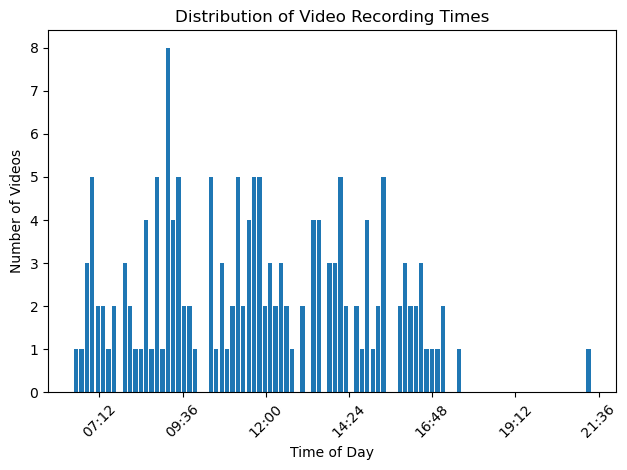

In [8]:
from datetime import datetime

stmt = (
    select(Video.start_time)
)

with session_cls() as session:
    result = session.execute(stmt)
    all = result.fetchall()
    all_times = [mdates.date2num(datetime.combine(datetime.today(), t[0].time())) for t in all]
    
fig, ax = plt.subplots()
ax.hist(all_times, bins=24 * 4, rwidth=0.8)
ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
plt.xlabel("Time of Day")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Recording Times")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()